In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://classes.cs.uoregon.edu/18F/cis199ids/data/FIFA2018Statistics.csv'
fifa = pd.read_csv(path)

In [3]:
#fifa['Man of the Match'].replace(('No', 'Yes'), (0, 1), inplace=True)

In [4]:
fifa.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [5]:
fifa.sample(n=15, random_state=1)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
121,10-07-2018,Belgium,France,0,60,9,3,5,1,5,...,3,0,0,No,NaN,Semi- Finals,No,0,NaN,NaN
104,02-07-2018,Brazil,Mexico,2,47,21,10,7,4,8,...,2,0,0,Yes,51.0,Round of 16,No,0,NaN,NaN
55,23-06-2018,Mexico,Korea Republic,2,59,13,5,6,2,5,...,0,0,0,Yes,26.0,Group Stage,No,0,NaN,NaN
56,23-06-2018,Germany,Sweden,2,71,16,5,4,7,8,...,0,1,0,Yes,48.0,Group Stage,No,0,NaN,NaN
33,19-06-2018,Egypt,Russia,1,53,13,1,8,4,4,...,1,0,0,No,47.0,Group Stage,No,0,1.0,47.0
118,07-07-2018,Russia,Croatia,2,38,13,7,4,2,6,...,1,0,0,No,31.0,Quarter Finals,Yes,3,NaN,NaN
122,11-07-2018,Croatia,England,2,54,22,7,11,4,8,...,2,0,0,Yes,68.0,Semi- Finals,No,0,NaN,NaN
35,20-06-2018,Morocco,Portugal,0,53,16,4,10,2,7,...,1,0,0,No,NaN,Group Stage,No,0,NaN,NaN
31,19-06-2018,Senegal,Poland,2,43,8,2,4,2,3,...,2,0,0,Yes,60.0,Group Stage,No,0,NaN,NaN
51,22-06-2018,Switzerland,Serbia,2,58,20,5,8,7,7,...,1,0,0,Yes,52.0,Group Stage,No,0,NaN,NaN


In [6]:
for item in fifa.columns:
    print(item)

Date
Team
Opponent
Goal Scored
Ball Possession %
Attempts
On-Target
Off-Target
Blocked
Corners
Offsides
Free Kicks
Saves
Pass Accuracy %
Passes
Distance Covered (Kms)
Fouls Committed
Yellow Card
Yellow & Red
Red
Man of the Match
1st Goal
Round
PSO
Goals in PSO
Own goals
Own goal Time


There are multiple columns you could drop but if I had to choose 2 I would probably choose:
    1. Date
    2. Distance
I would choose these because they do not factor in to determining the 'Man of the Match'

In [7]:
X_fifa = fifa.drop('Man of the Match', axis=1)

In [8]:
fifa['Man of the Match'].replace(('No', 'Yes'), (0, 1), inplace=True)
y_fifa = fifa['Man of the Match']

In [9]:
fifa['Team'].unique()

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

In [10]:
fifa['Opponent'].unique()

array(['Saudi Arabia', 'Russia', 'Uruguay', 'Egypt', 'Iran', 'Morocco',
       'Spain', 'Portugal', 'Australia', 'France', 'Iceland', 'Argentina',
       'Denmark', 'Peru', 'Nigeria', 'Croatia', 'Serbia', 'Costa Rica',
       'Mexico', 'Germany', 'Switzerland', 'Brazil', 'Korea Republic',
       'Sweden', 'Panama', 'Belgium', 'England', 'Tunisia', 'Japan',
       'Colombia', 'Senegal', 'Poland'], dtype=object)

These will not work in our model because they are strings and not actual values, like ints or T/F.

In [11]:
X_fifa = pd.get_dummies(X_fifa, columns=['Team', 'Opponent'])
X_fifa.head()

,Date,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,...,Opponent_Portugal,Opponent_Russia,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay
0,14-06-2018,5,40,13,7,3,3,6,3,11,...,0,0,1,0,0,0,0,0,0,0
1,14-06-2018,0,60,6,0,3,3,2,1,25,...,0,1,0,0,0,0,0,0,0,0
2,15-06-2018,0,43,8,3,3,2,0,1,7,...,0,0,0,0,0,0,0,0,0,1
3,15-06-2018,1,57,14,4,6,4,5,1,13,...,0,0,0,0,0,0,0,0,0,0
4,15-06-2018,0,64,13,3,6,4,5,0,14,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_fifa.shape, y_fifa.shape

((128, 88), (128,))

The rows need to match because thats how many games were played, the columns shouldn't match because we have multiple features but only one target.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_fifa, y_fifa, test_size = .30, random_state = 199)

In [15]:
X_train = X_train.copy()
X_train = X_train.drop(['Date', 'PSO', 'Goals in PSO', 'Round', 'Own goals', 'Own goal Time'], axis=1)
X_tets = X_test.copy()
X_test = X_test.drop(['Date', 'PSO', 'Goals in PSO', 'Round', 'Own goals', 'Own goal Time'], axis=1)

In [16]:
X_train['1st Goal'] = X_train['1st Goal'].fillna(0)
X_test['1st Goal'] = X_test['1st Goal'].fillna(0)

Yes, filling in 1st goal with a 0 instead of NaN is good because if the value is NaN then that means the team did not score a goal that particular match. Filling it in with the average or the median would give bad predictions and bad accuracy.

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
model = GaussianNB( )

In [19]:
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [20]:
y_predictions = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.5641025641025641

An accuracy score of 56.4% is not very good at all. Some things we could do to improve our accuracy score would be taking out more feature data that is not helpful, such as 'Team' or 'Opponent'.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier(max_leaf_nodes=8,
                               max_depth=5,
                               min_samples_leaf=20,
                               criterion='gini',
                               splitter='random',
                               random_state=199)

model.fit(X_train, y_train);

y_predictions = model.predict(X_test)

accuracy_score(y_test, y_predictions)

0.6153846153846154

In [24]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model,
                           out_file='fifa.dot',
                           feature_names=X_train.columns,
                           class_names=['Man of the Match', 'No Man of the Match'],
                           rounded=True,
                           filled=True)

In [25]:
!dot -Tjpg fifa.dot -o my-fifa-decision-tree14-6-4.jpg

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
from sklearn.ensemble import RandomForestRegressor

For the first random forest, I will use 1000 estimators, 3 max leaf nodes, 2 for the max depth, and 215 samples

In [55]:
rf = RandomForestRegressor(n_estimators=1000,
                           max_leaf_nodes=3,
                           max_depth=2,
                           min_samples_leaf=215,
                           random_state=199)

rf.fit(X_train, y_train);

predictions = rf.predict(X_test)
accuracy_score(y_test, predictions.round())

0.46153846153846156

We got a low 46%

For the second random forest we will change leaf nodes to 8, depth to 4, and min samples to 20

In [56]:
rf2 = RandomForestRegressor(n_estimators=1000,
                           max_leaf_nodes=8,
                           max_depth=4,
                           min_samples_leaf=20,
                           random_state=199)

In [49]:
rf2.fit(X_train, y_train);

In [50]:
predictions = rf2.predict(X_test)
accuracy_score(y_test, predictions.round())

0.6666666666666666

We got a better 66%

Text(92.68,0.5,'predicted label')

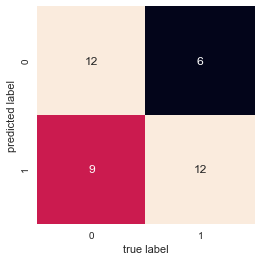

In [53]:
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

If we look at the accuracy score from each model that we performed on our data, we see:

Naive Bayes: 0.5641025641025641 -> 56.41%

Decicsion Tree: 0.6153846153846154 -> 61.54%

Random Forest: 0.6666666666666666 -> 66.67%

It is clear from our results that our models only get more accurate.